# CNNs on CIFAR-10

Comparing different CNNs performance on the CIFAR-10 Dataset
- Just CNNs
- Include MaxPool
- Include Dropout

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Run on GPU

In [3]:
tf.config.list_physical_devices('GPU')

2023-10-28 17:30:21.672404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 17:30:21.691629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 17:30:21.691723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
#@Load CIFAR-10 Dataset
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


In [6]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, train_size=0.5, shuffle=False)

In [7]:
#@One hot encoding
labels = np.array([0, 1 ,2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)

# Design one hot encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on the labels
encoder.fit(labels)

# Function to one-hot encode data
def one_hot_encode(data):
    return encoder.transform(np.array(data).reshape(-1, 1))


# Function to decode one-hot encoded data
def decode(encoded_data):
    return encoder.inverse_transform(encoded_data).flatten().tolist()

In [8]:
y_train = one_hot_encode(y_train)
y_valid = one_hot_encode(y_valid)
y_test = one_hot_encode(y_test)

## Phase 1:

VGG Style Conv layers followed by FCNN Layers and classification. 

In [9]:
#@ Define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 51200)             0

2023-10-28 17:30:36.710784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 17:30:36.710890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 17:30:36.710928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Training

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=15)

Epoch 1/15


2023-10-28 17:30:42.488929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2023-10-28 17:30:42.895932: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-10-28 17:30:42.895948: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2023-10-28 17:30:42.895984: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-28 17:30:43.295921: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2023-10-28 17:30:43.306405: I tensorflow/compiler/xla/service/service.cc:168] XLA servic

1563/1563 [==============================] - 13s 7ms/step - loss: 1.5817 - accuracy: 0.4206 - val_loss: 1.3060 - val_accuracy: 0.5310
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1627 - accuracy: 0.5853 - val_loss: 1.0379 - val_accuracy: 0.6440
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9573 - accuracy: 0.6603 - val_loss: 0.9788 - val_accuracy: 0.6514
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7942 - accuracy: 0.7220 - val_loss: 0.9260 - val_accuracy: 0.6790
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6307 - accuracy: 0.7772 - val_loss: 1.0450 - val_accuracy: 0.6648
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4594 - accuracy: 0.8371 - val_loss: 1.2774 - val_accuracy: 0.6608
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3173 - accuracy: 0.8892 - val_loss: 1.3787 - val_accuracy: 0.6

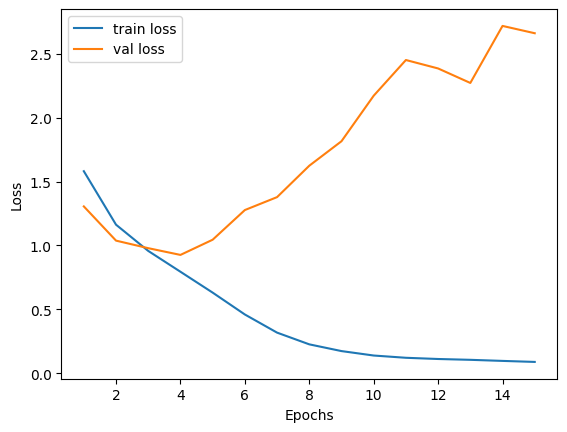

In [11]:
# plotting loss vs epoch curve of model
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Find and print model accuracy against test set
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 2.6374 - accuracy: 0.6378 - 357ms/epoch - 2ms/step

Test accuracy: 0.6377999782562256


### Confusion Matrix

157/157 [==============================] - 0s 2ms/step


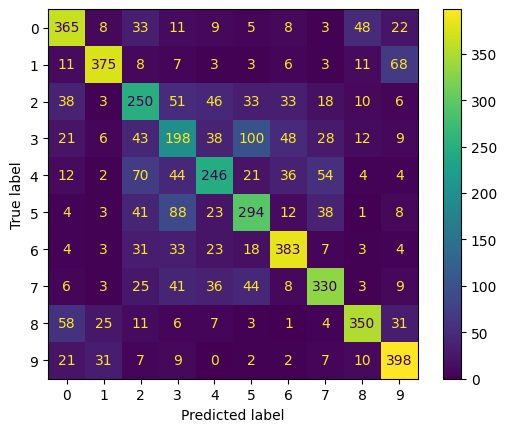

In [18]:
# Make Predictions over test set
predictions = model.predict(x_test)

y_pred_classes = decode(predictions)
y_true_classes = decode(y_test)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Phase 2:

VGG Style Conv layers and Max Pooling layers followed by FCNN classifier.

In [20]:
#@ Define model
model_maxpool = Sequential()
model_maxpool.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_maxpool.add(Conv2D(32, (3,3), activation='relu'))
model_maxpool.add(MaxPooling2D(2,2))
model_maxpool.add(Conv2D(64, (3,3), activation='relu'))
model_maxpool.add(Conv2D(64, (3,3), activation='relu'))
model_maxpool.add(MaxPooling2D(2,2))
model_maxpool.add(Conv2D(128, (3,3), activation='relu'))
model_maxpool.add(Conv2D(128, (3,3), activation='relu'))
model_maxpool.add(Flatten())
model_maxpool.add(Dense(100, activation='relu'))
model_maxpool.add(Dense(10, activation='softmax'))

model_maxpool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

### Training

In [21]:
model_maxpool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model_maxpool.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5921 - accuracy: 0.4125 - val_loss: 1.2399 - val_accuracy: 0.5696
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1093 - accuracy: 0.6025 - val_loss: 1.0472 - val_accuracy: 0.6296
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9279 - accuracy: 0.6730 - val_loss: 0.9426 - val_accuracy: 0.6684
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8075 - accuracy: 0.7158 - val_loss: 0.8574 - val_accuracy: 0.7042
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7121 - accuracy: 0.7507 - val_loss: 0.8358 - val_accuracy: 0.7106
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6408 - accuracy: 0.7745 - val_loss: 0.8190 - val_accuracy: 0.7226
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5740 - accuracy: 0.7999 - val_loss: 0.8270 - val_accura

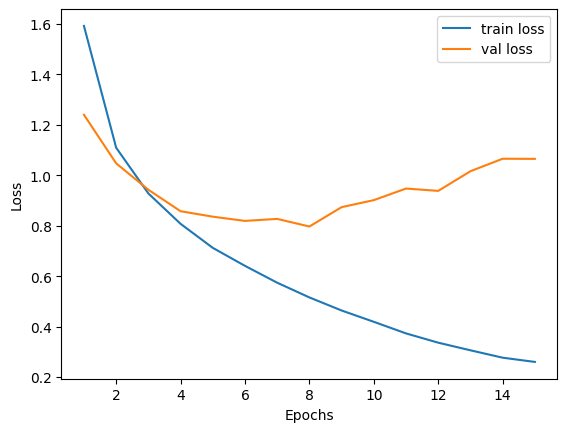

In [22]:
# plotting loss vs epoch curve of model
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Find and print model accuracy against test set
test_loss, test_acc = model_maxpool.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 1.0690 - accuracy: 0.7242 - 263ms/epoch - 2ms/step

Test accuracy: 0.7242000102996826


### Confusion matrx

157/157 [==============================] - 0s 1ms/step


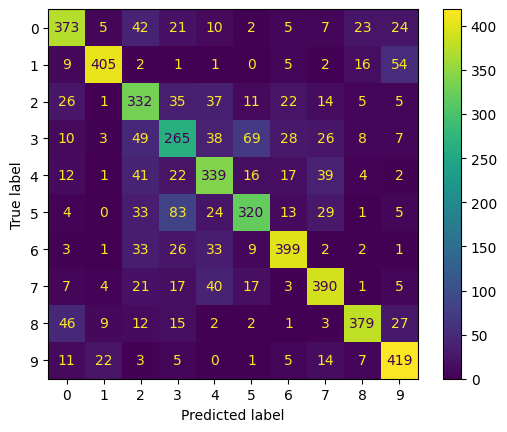

In [24]:
# Make Predictions over test set
predictions = model_maxpool.predict(x_test)

y_pred_classes = decode(predictions)
y_true_classes = decode(y_test)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Phase 3:

VGG Style Conv, MaxPool and Dropout layers followed by FCNN classifier.

In [25]:
#@ Define model
model_f = Sequential()
model_f.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_f.add(Conv2D(32, (3,3), activation='relu'))
model_f.add(MaxPooling2D(2,2))
model_f.add(Dropout(0.1))
model_f.add(Conv2D(64, (3,3), activation='relu'))
model_f.add(Conv2D(64, (3,3), activation='relu'))
model_f.add(MaxPooling2D(2,2))
model_f.add(Dropout(0.1))
model_f.add(Conv2D(128, (3,3), activation='relu'))
model_f.add(Conv2D(128, (3,3), activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Flatten())
model_f.add(Dense(100, activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Dense(100, activation='relu'))
model_f.add(Dropout(0.2))
model_f.add(Dense(10, activation='softmax'))

model_f.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

### Training

In [26]:
model_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model_f.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=15)

Epoch 1/15


2023-10-28 17:49:49.641337: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-28 17:49:49.777362: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2023-10-28 17:49:49.777379: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2023-10-28 17:49:49.777842: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2023-10-28 17:49:49.778202: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile gener

1563/1563 [==============================] - 12s 7ms/step - loss: 1.7035 - accuracy: 0.3602 - val_loss: 1.3197 - val_accuracy: 0.5084
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2626 - accuracy: 0.5498 - val_loss: 1.0946 - val_accuracy: 0.6072
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0762 - accuracy: 0.6236 - val_loss: 0.9747 - val_accuracy: 0.6644
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9468 - accuracy: 0.6720 - val_loss: 0.8965 - val_accuracy: 0.6996
Epoch 5/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8659 - accuracy: 0.7024 - val_loss: 0.8522 - val_accuracy: 0.7096
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8024 - accuracy: 0.7240 - val_loss: 0.8606 - val_accuracy: 0.7106
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7566 - accuracy: 0.7406 - val_loss: 0.8064 - val_accuracy: 0.729

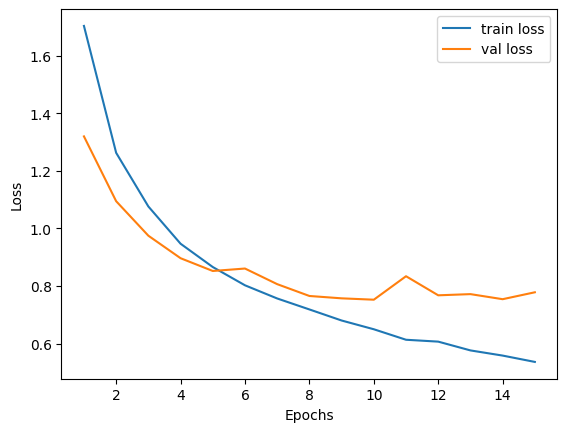

In [27]:
# plotting loss vs epoch curve of model
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Find and print model accuracy against test set
test_loss, test_acc = model_f.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 0.7944 - accuracy: 0.7506 - 304ms/epoch - 2ms/step

Test accuracy: 0.7505999803543091


### Confusion matrx

157/157 [==============================] - 0s 602us/step


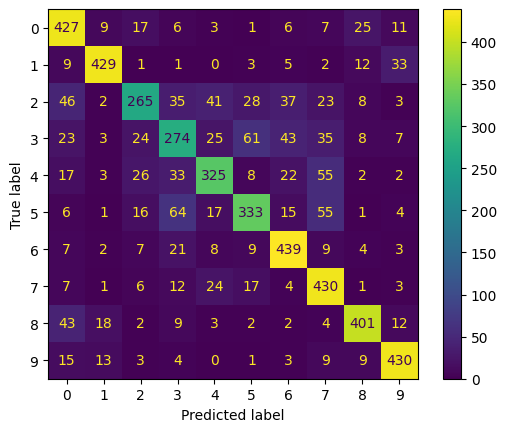

In [29]:
# Make Predictions over test set
predictions = model_f.predict(x_test)

y_pred_classes = decode(predictions)
y_true_classes = decode(y_test)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()